In [1]:
import json
import numpy as np
import cairocffi as cairo

with open("test.json", "r") as file:
    img = json.loads(file.read())


In [2]:
def vector_to_raster(img):
    side=28
    line_diameter=16
    padding=16
    bg_color=(0,0,0)
    fg_color=(1,1,1)
    original_side = 256.
        
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, side, side)
    ctx = cairo.Context(surface)
    ctx.set_antialias(cairo.ANTIALIAS_BEST)
    ctx.set_line_cap(cairo.LINE_CAP_ROUND)
    ctx.set_line_join(cairo.LINE_JOIN_ROUND)
    ctx.set_line_width(line_diameter)

    # scale to match the new size
    # add padding at the edges for the line_diameter
    # and add additional padding to account for antialiasing
    total_padding = padding * 2. + line_diameter
    new_scale = float(side) / float(original_side + total_padding)
    ctx.scale(new_scale, new_scale)
    ctx.translate(total_padding / 2., total_padding / 2.)
    # clear background
    ctx.set_source_rgb(*bg_color)
    ctx.paint()
    bbox = np.hstack(img).max(axis=1)
    offset = ((original_side, original_side) - bbox[:2]) / 2.
    offset = offset.reshape(-1,1)
    centered = [stroke[:2] + offset for stroke in img]

    # draw strokes, this is the most cpu-intensive part
    ctx.set_source_rgb(*fg_color)        
    for xv, yv in centered:
        ctx.move_to(xv[0], yv[0])
        for x, y in zip(xv, yv):
            ctx.line_to(x, y)
        ctx.stroke()

    data = surface.get_data()
    raster_image = np.copy(np.asarray(data)[::4])
    return raster_image.reshape(28, 28)

In [3]:
r = vector_to_raster(img)
r.shape

(28, 28)

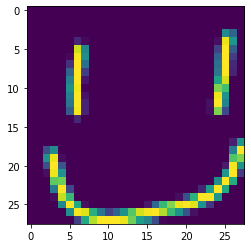

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(r)
